## Python Challenge - HR Analytics

- From: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists
- We are looking to better understand employee turnover for data science roles, and what drives their decision to change roles
- Each row represents an employee, each column contains the employee's job seeking data.
- The “JobHunting” column is our target, this represents if the employee is JobHunting or not.

In [1]:
# Start by importing all the packages we might need
# Import Pandas and Matplotlib
import pandas as pd
import matplotlib
import json


In [3]:
#Read the data into a variable
# Path to your main dataset
dataset_path = '/Users/mohjaiswal/Downloads/Python Challenges/Human Resource Challenge - April 7th 2021/archive/aug_train.csv'
df = pd.read_csv(dataset_path)
df.head(1),df.tail(1)


   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM     

In [14]:
#Let's see how much data we're working with, print the dimensions of the dataset
df.info() # - this does not give the dimensions exactly use
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

(19158, 14)

In [5]:
#Display the first few rows of the data
display(df.head(5))


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## Basic Insights
- Let's start off with some basic data insights


In [9]:
#Which types of major_disciplines are in this dataset?
df['major_discipline'].unique()


array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [13]:
#How many employees are currently JobHunting?
# Assuming target is the column of desire and '1.0' is the people jobHunting. Assuming that this dataset might contain null values or data entry errors.
# We can just use the df['target'].value_counts() to get the jobHunting figure assuming the column contains only zeros and ones.

# In this case we develop a fool-proof method to prevent counting any numbers that are not a '1.0' value.
counts = df['target'].value_counts()

# Getting the count for 1.0
count_1 = counts.get(1.0, 0)  # Default to 0 if 1.0 is not found
print(count_1)


4777


<Axes: xlabel='education_level'>

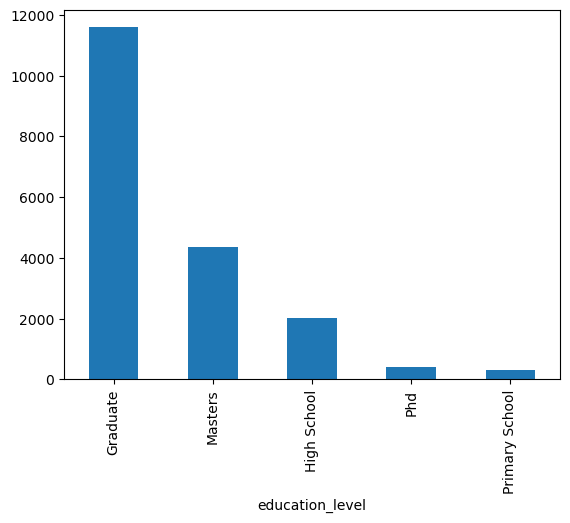

In [16]:
#Plot the number of employees per education level
empbyeduc = df['education_level'].value_counts()
empbyeduc.plot(kind='bar')


<Axes: >

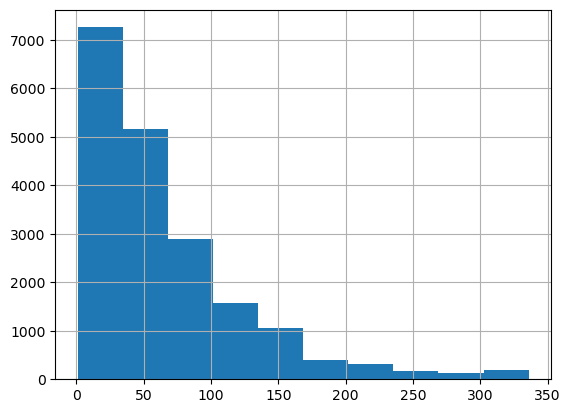

In [19]:
#Plot a histogram of the training_hours of the employees
df['training_hours'].hist()


## Advanced Insights
- Let's combine features for some more advanced insights


In [23]:
#Create a function to convert training_hours from integer to categorical
#Have the categorical values be equal to: ">=50 hours" and "<50 hours"

def training_hrs_categorical(training_hours):
    if training_hours < 50:
        return "<50 hours"
    else:
        return ">=50 hours"
    

In [25]:
#Define a new column in our DataFrame called "train_categorical"
#Have that columns be equal to our new function applied to the training_hours column
# We need to use the apply function to apply the defined function to the training_hours column and make a new calculated categorical column
df['train_categorical'] = df['training_hours'].apply(training_hrs_categorical)
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,train_categorical
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,<50 hours
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,<50 hours
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,>=50 hours
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,>=50 hours
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,<50 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,<50 hours
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,>=50 hours
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,<50 hours
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,>=50 hours


In [26]:
# Create a Pivot Table measuring the amount of JobHunters by train_categorical and wether they have relevent_experience
pivot_table = df.pivot_table(values='target',columns='train_categorical',index='relevent_experience',aggfunc='sum')
pivot_table


train_categorical,<50 hours,>=50 hours
relevent_experience,,
Has relevent experience,1555.0,1406.0
No relevent experience,965.0,851.0


<Axes: title={'center': 'Job Seekers by Hours Trained and Experience Level'}, xlabel='relevent_experience'>

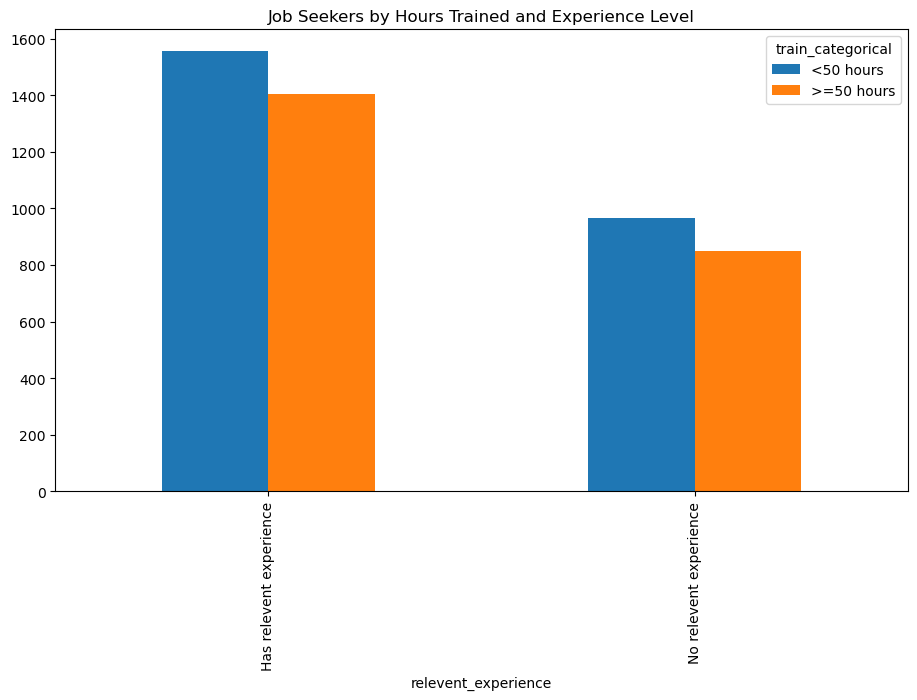

In [32]:
#Visualize your pivot table, make sure to add a title, and to size your graph appropriately
# Graph Sizing
def dynamic_figsize(data_length, base_size=(10, 6), scale_factor=0.5):
    """Adjusts figsize based on the length of the data."""
    width, height = base_size
    width += scale_factor * data_length
    return (width, height)
pivot_table.plot(kind='bar',figsize=dynamic_figsize(len(pivot_table)), title='Job Seekers by Hours Trained and Experience Level')


In [ ]:
#Export your graph to JPG/PNG - pivot_table.savefig('JobSeekers.png')

In [ ]:
#Q: In 1-2 senteces, explain your findings from your graph. Which demographic is JobHunting the most?
#A: 

